In [ ]:
pip install sklearn


In [ ]:
#Google drive logins
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


LIBRARIES

In [ ]:
#import important libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
#upload csv fer2013
df=pd.read_csv("/content/drive/MyDrive/fer2013_2.csv")
df.head()

,emotion,pixels,Usage
0,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
1,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
2,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
3,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
4,6,39 75 78 58 58 45 49 48 103 156 81 45 41 38 49...,Training


In [ ]:
df.loc[df['emotion'] == 3, ["emotion"]] = 0
df.loc[df['emotion'] == 4, ["emotion"]] = 1
df.loc[df['emotion'] == 5, ["emotion"]] = 2
df.loc[df['emotion'] == 6, ["emotion"]] = 3

In [ ]:
#to see emotions we have
df.emotion.unique()


array([1, 0, 3, 2])

In [ ]:
#Label rest of data
label_to_text={0:"happiness",1:"sadness",2:"Energetic",3:"calm"}

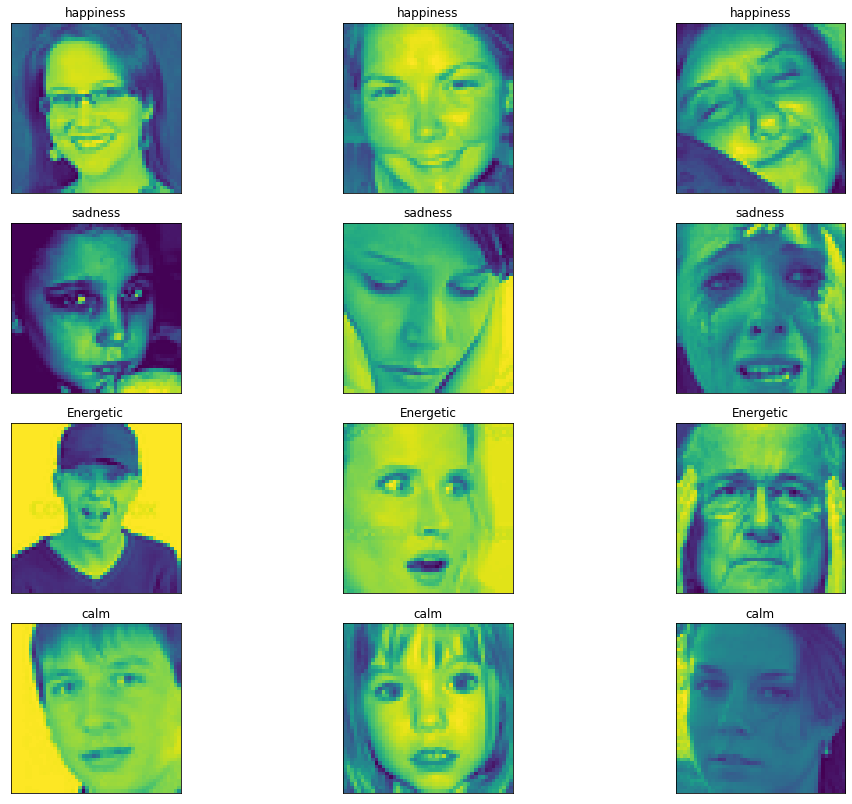

In [ ]:
#Showing some samples with pyplot lib
fig = pyplot.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(3):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = pyplot.subplot(5, 3, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        pyplot.tight_layout()

In [ ]:
#creating arrays from images
img_array = df.pixels.apply(lambda x : np.array(x.split (" ")).reshape(48,48,1).astype("float32"))

In [ ]:
img_array=np.stack(img_array,axis=0)

In [ ]:
#Image number and pixels
img_array.shape

(22515, 48, 48, 1)

In [ ]:
#values
lables=df.emotion.values

In [ ]:
#splitting train and test set by 20
X_train,X_test,y_train,y_test=train_test_split(img_array,lables,test_size=0.2)

In [ ]:
#train and test cases shapes
X_train.shape,y_train.shape, X_test.shape,y_test.shape

((18012, 48, 48, 1), (18012,), (4503, 48, 48, 1), (4503,))

MODEL 3

In [ ]:
"""
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np


model = Sequential()
model.add(Conv2D(input_shape=(48,48,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="softmax"))


model.summary()
"""



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 conv2d_62 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 conv2d_64 (Conv2D)          (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                 

In [ ]:
"""model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])"""

In [ ]:
"""from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,generator=X_train, validation_data= X_test, validation_steps=10,epochs=100,callbacks=[checkpoint,early])"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


ValueError: ignored

MODEL 1

In [ ]:
from matplotlib.cbook import flatten
myModel=tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(2,2),activation='relu',input_shape = (48,48,1)),
                                    tf.keras.layers.Conv2D(64,(2,2),activation="relu"),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        
                                        #
                                        tf.keras.layers.Conv2D(256,(3,3),activation="relu"),
                                       
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(1000,activation='relu'),
                                        tf.keras.layers.Dense(4,activation = 'softmax')                          
                                        ])




In [ ]:
myModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 47, 47, 32)        160       
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 19, 19, 128)       147584    
                                                                 
 conv2d_11 (Conv2D)          (None, 17, 17, 256)       295168    
                                                      

In [ ]:
myModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
file_name = 'best_model.h5'
checkpoint_path= os.path.join('checkpoint',file_name)


call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')


In [ ]:
history=myModel.fit(X_train,y_train,epochs=20,validation_split=.2,callbacks=call_back, shuffle=True)

Epoch 1/20
451/451 [==============================] - ETA: 0s - loss: 1.1838 - accuracy: 0.4821
Epoch 00001: val_accuracy improved from -inf to 0.55704, saving model to checkpoint/best_model.h5
451/451 [==============================] - 19s 40ms/step - loss: 1.1838 - accuracy: 0.4821 - val_loss: 1.0626 - val_accuracy: 0.5570
Epoch 2/20
451/451 [==============================] - ETA: 0s - loss: 0.9427 - accuracy: 0.6024
Epoch 00002: val_accuracy improved from 0.55704 to 0.61005, saving model to checkpoint/best_model.h5
451/451 [==============================] - 16s 36ms/step - loss: 0.9427 - accuracy: 0.6024 - val_loss: 0.9082 - val_accuracy: 0.6100
Epoch 3/20
451/451 [==============================] - ETA: 0s - loss: 0.8215 - accuracy: 0.6613
Epoch 00003: val_accuracy improved from 0.61005 to 0.67222, saving model to checkpoint/best_model.h5
451/451 [==============================] - 16s 36ms/step - loss: 0.8215 - accuracy: 0.6613 - val_loss: 0.8085 - val_accuracy: 0.6722
Epoch 4/20
44

MODEL RESULTS

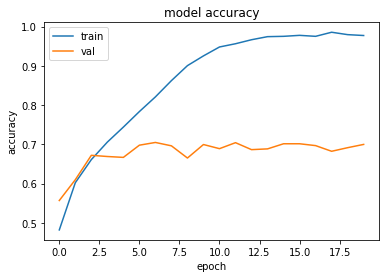

In [ ]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

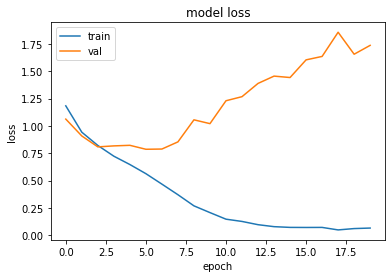

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()